In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv("D:\Advanced_training\Advanced-training-Python-AIML\Day-6\Algerian_forest_fires_cleaned_dataset.csv")

In [75]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [76]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [77]:
data.groupby('month')['Classes'].count()

month
6    60
7    61
8    62
9    60
Name: Classes, dtype: int64

In [78]:
data.groupby('day')['Classes'].count()

day
1     8
2     8
3     8
4     8
5     8
6     8
7     8
8     8
9     8
10    8
11    8
12    8
13    8
14    7
15    8
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    8
24    8
25    8
26    8
27    8
28    8
29    8
30    8
31    4
Name: Classes, dtype: int64

In [79]:
data.drop(columns=['day','month','year'],inplace=True)

In [80]:
data['Classes'] = data['Classes'].str.strip()


In [81]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [82]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [83]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)

In [84]:
data['Classes'].unique()

array([0, 1])

In [85]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [86]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [87]:
data.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [88]:
x = data.drop('FWI',axis=1)
y = data['FWI'] 

In [89]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [90]:
y.describe()

count    243.000000
mean       7.035391
std        7.440568
min        0.000000
25%        0.700000
50%        4.200000
75%       11.450000
max       31.100000
Name: FWI, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [93]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [94]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

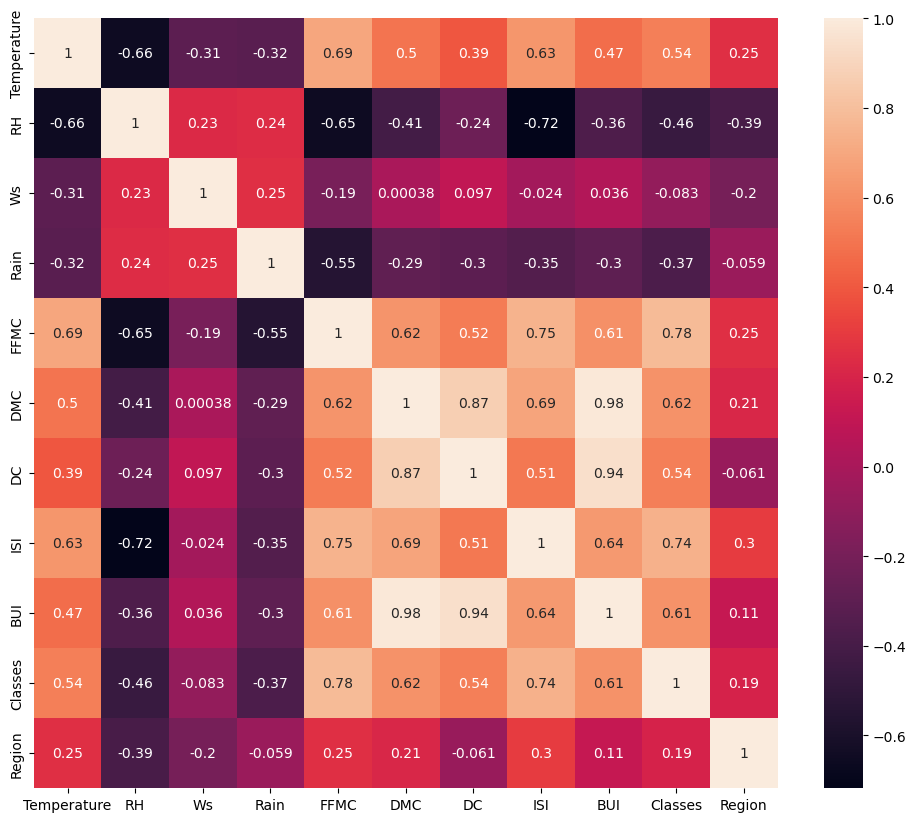

In [98]:
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot=True)

In [109]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        # print(corr_matrix.iloc[i])
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [110]:
corr_features = correlation(x_train,0.85)
corr_features

{'BUI', 'DC'}

In [113]:
x_train.drop(columns=corr_features,inplace=True)
x_test.drop(columns=corr_features,inplace=True)

In [114]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [117]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [123]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [124]:
x_train_scaled

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,-0.842842,0.783080,1.299720,-0.337274,-0.128056,-0.882729,-0.629633,-1.104315,-0.989071
1,-0.301758,0.649508,-0.598748,-0.290487,-1.217586,-0.866876,-0.930585,-1.104315,1.011050
2,2.133120,-2.088702,-0.219054,-0.384060,1.157031,0.615402,2.727139,0.905539,1.011050
3,-0.031216,-0.151919,0.920027,-0.243701,-0.037262,-0.272379,-0.606483,-1.104315,-0.989071
4,-0.031216,-1.020132,-0.598748,-0.056555,-0.009325,-0.605297,-0.699084,-1.104315,-0.989071
...,...,...,...,...,...,...,...,...,...
177,-2.195553,1.317365,-0.219054,-0.196914,-2.286163,-1.096748,-1.069486,-1.104315,-0.989071
178,-1.113385,1.183793,0.540333,1.066320,-1.971876,-0.930289,-1.023186,-1.104315,-0.989071
179,-1.925011,0.916651,0.540333,2.984564,-2.209337,-1.065041,-1.069486,-1.104315,-0.989071
180,0.509868,-0.218705,0.160640,-0.384060,0.730997,0.377603,0.597325,0.905539,1.011050


In [125]:
x_test_scaled 

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,-0.301758,0.115224,-0.219054,-0.384060,0.633218,-0.042508,0.203772,0.905539,-0.989071
1,0.239326,-0.552633,-0.978441,-0.384060,0.737981,-0.383352,0.365823,0.905539,-0.989071
2,-1.113385,-0.285490,0.920027,0.645242,-0.973140,-0.914435,-0.837985,-1.104315,1.011050
3,0.509868,-0.285490,-0.978441,-0.290487,0.130358,0.314190,-0.629633,-1.104315,1.011050
4,-0.572300,0.182009,-0.598748,-0.384060,0.542424,0.100172,-0.074030,0.905539,1.011050
...,...,...,...,...,...,...,...,...,...
56,0.509868,-0.419061,-0.219054,0.972747,-0.197897,-0.605297,-0.745384,-1.104315,1.011050
57,0.239326,-0.352276,0.160640,-0.384060,0.689092,0.076392,0.435274,0.905539,1.011050
58,-0.301758,0.649508,-0.598748,-0.384060,0.458614,-0.510178,-0.236081,0.905539,1.011050
59,1.050952,-1.955130,-0.978441,-0.337274,0.905601,0.876980,0.967727,0.905539,1.011050


Text(0.5, 1.0, 'x_train after scaling')

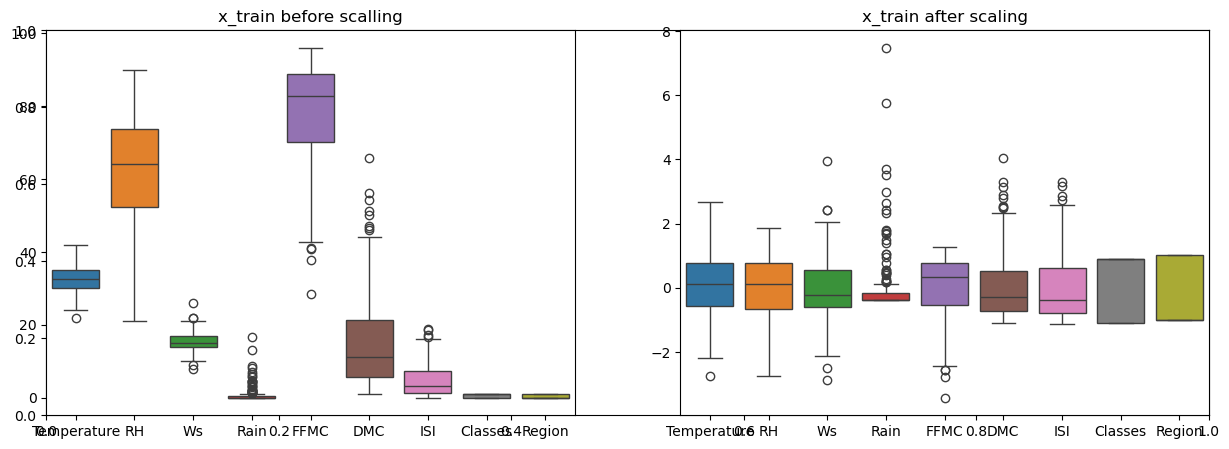

In [135]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scalling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

mean_absolute_error  0.5468236465249985
r2_score  0.9847657384266951


<Axes: xlabel='FWI'>

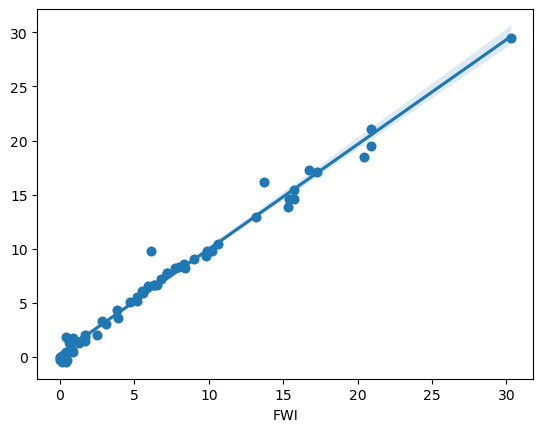

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

## Lasso Regression

mean_absolute_error  1.1331759949144085
r2_score  0.9492020263112388


<Axes: xlabel='FWI'>

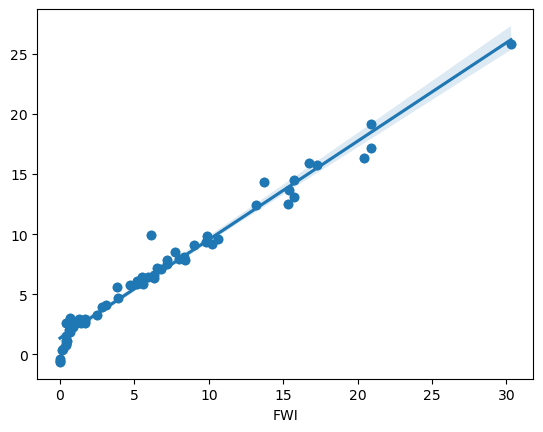

In [146]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

## Ridge Regression

mean_absolute_error  0.5642305340105693
r2_score  0.9842993364555513


<Axes: xlabel='FWI'>

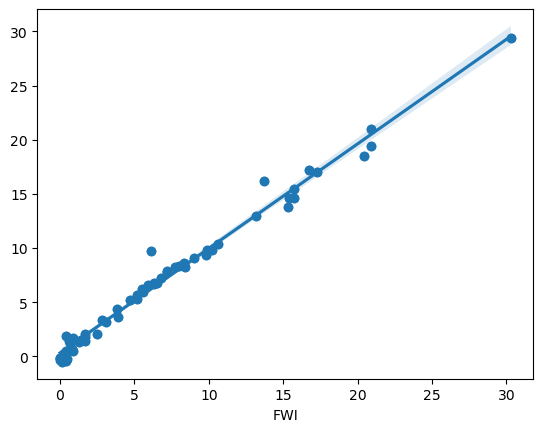

In [147]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

## ElasticNet Regression

mean_absolute_error  1.8822353634896
r2_score  0.8753460589519703


<Axes: xlabel='FWI'>

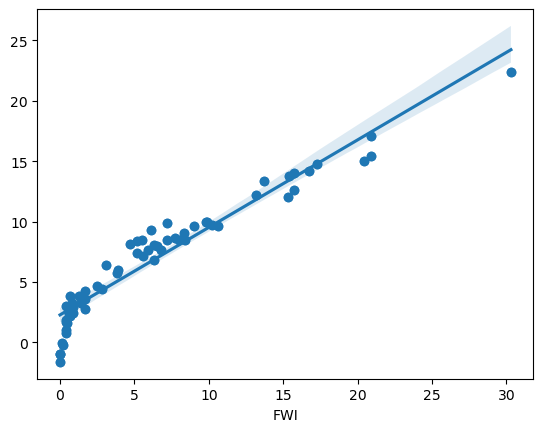

In [148]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred = elasticnet.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error ",mae)
print("r2_score ",score)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)